## We will use a Random frest Model to explain exchange rate regime classification. Our label excange rate regimes, has three categories 0 -- for flexible regimes, 1 for intermediate regimes and 2 for fixed regimes. 
## There are seven different features -- trade openess, export concentration, capital controls index, land area, population, and institutional quaility.

In [6]:
## Randome Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns  

%matplotlib inline

## Import the dataset

In [2]:
data = pd.read_csv('Data.csv')
data.head()
data = data.dropna()
print(data.shape)
print(list(data.columns)) 

(1781, 7)
['Regime1', 'TradeOpenness_Ghosh', 'ExportConcentration', 'AREAERcapitalcontrolsindex', 'Landarea ', 'Population', 'IQ']


In [3]:
data.head()

,Regime1,TradeOpenness_Ghosh,ExportConcentration,AREAERcapitalcontrolsindex,Landarea,Population,IQ
0,0,0.090000,0.530967,1.000000,652230,25215251.86,-2.096063
1,0,0.067000,0.429394,1.000000,652230,25950815.50,-2.123715
2,0,0.110000,0.510389,0.857143,652230,26697430.19,-2.123715
3,0,0.078003,0.555533,0.857143,652230,27465525.27,-1.748382
4,0,0.108290,0.560161,0.857143,652230,28255718.73,-1.571232


## Display the data types of each column: 

In [4]:
data.dtypes

Regime1                         int64
TradeOpenness_Ghosh           float64
ExportConcentration           float64
AREAERcapitalcontrolsindex    float64
Landarea                        int64
Population                    float64
IQ                            float64
dtype: object

##  Shows summary statistics

In [5]:
data.describe()   

,Regime1,TradeOpenness_Ghosh,ExportConcentration,AREAERcapitalcontrolsindex,Landarea,Population,IQ
count,1781.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000
mean,0.935430,0.452957,0.463238,0.610537,8.539492e+05,4.531053e+07,-0.060201
std,0.918467,1.361444,0.179901,2.255836,2.145751e+06,1.525174e+08,0.844529
min,0.000000,0.000002,0.002305,0.000000,2.600000e+02,4.226000e+04,-2.123715
25%,0.000000,0.207335,0.346084,0.277778,4.000000e+04,3.060554e+06,-0.665993
50%,1.000000,0.332467,0.441190,0.611111,1.836400e+05,8.860760e+06,-0.220199
75%,2.000000,0.534878,0.567919,0.833333,6.535400e+05,2.825572e+07,0.527391
max,2.000000,56.000000,1.655546,95.000000,1.638851e+07,1.344130e+09,1.912013


## To get the count of the tree different regime categories

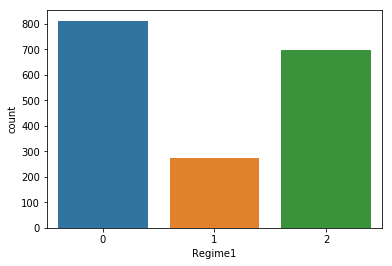

In [7]:
sns.countplot(x = 'Regime1', data = data)  

## Pairwise correlations among all variables 

In [8]:
data.corr(method='pearson', min_periods=1)

,Regime1,TradeOpenness_Ghosh,ExportConcentration,AREAERcapitalcontrolsindex,Landarea,Population,IQ
Regime1,1.000000,0.060855,0.041785,0.047550,-0.185509,-0.105607,-0.044149
TradeOpenness_Ghosh,0.060855,1.000000,0.035069,-0.008453,-0.048426,-0.034645,0.120250
ExportConcentration,0.041785,0.035069,1.000000,-0.001165,-0.081032,-0.092971,-0.051491
AREAERcapitalcontrolsindex,0.047550,-0.008453,-0.001165,1.000000,-0.002491,0.009624,-0.045831
Landarea,-0.185509,-0.048426,-0.081032,-0.002491,1.000000,0.426547,0.027013
Population,-0.105607,-0.034645,-0.092971,0.009624,0.426547,1.000000,-0.062737
IQ,-0.044149,0.120250,-0.051491,-0.045831,0.027013,-0.062737,1.000000


## Next we will create a numpy array of the features and label.

In [9]:
Features = np.array(data[['TradeOpenness_Ghosh', 'ExportConcentration', 'AREAERcapitalcontrolsindex', 'Landarea ', 'Population', 'IQ']])
Labels =  np.array(data[['Regime1']])    

## Now we will partition the dataset into training and test datasets

In [10]:
# Split the dataset into test and training set
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 1425)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

## Numeric features are scaled or standardized.
## A Zscore scale object is defined using the StandarScaler function from the Scikit Learn preprocessing package. Here each feature is subtracted from its mean and then divided by the standard deviation.
## The scaler is fit to the training features. Subsequently, this scaler is used to apply the same scaling to the test data and in production.
## The training features are scaled using the transform method.

In [11]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

## Define and fit a random forest model with 5 trees.

In [12]:
nr.seed(444)
rf_clf = RandomForestClassifier(n_estimators=5)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Next we score the test data subset
## The test features are scaled using the scaler computed for the training features. 
## The predict method is then used to compute the scores from the scaled features. 

In [13]:
X_test = scale.transform(X_test)
scores = rf_clf.predict(X_test)

## Evaluating the model results

In [15]:
# Evaluating the model results

def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Flexible   Score Intermediate    Score Fixed')
    print('Actual Flexible      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Intermediate  %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Fixed         %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Flexible  Intermediate  Fixed')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores)

                 Confusion matrix
                 Score Flexible   Score Intermediate    Score Fixed
Actual Flexible         507               86                73
Actual Intermediate      60               93                57
Actual Fixed             83               63               403

Accuracy        0.70
 
          Flexible  Intermediate  Fixed
Num case   666.00     210.00      549.00
Precision   0.78      0.38       0.76
Recall      0.76      0.44       0.73
F1          0.77      0.41       0.74


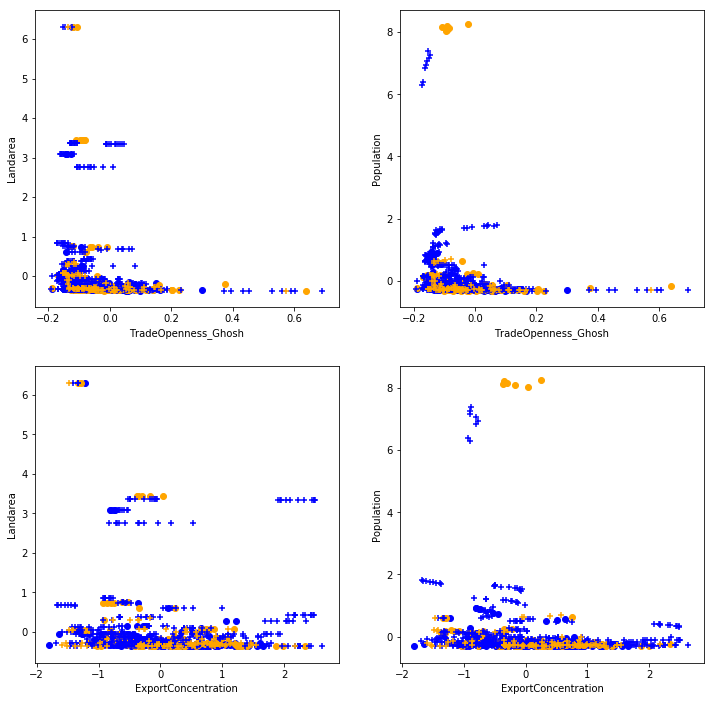

In [19]:
# Displays a set of plots showing correctly (as '+') and incorrectly (as 'o') cases

def plot_data_score(data, y_test, scores):
    '''Function to plot data data by type'''
    ## Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    
    ## Create data frame from the test data
    data = pd.DataFrame(data)
    levels = {0:'Flexible', 1:'Intermediate', 2:'Fixed'}
    data['Regime1'] = [levels[x] for x in y_test]
    data.columns = ['TradeOpenness_Ghosh', 'ExportConcentration', 'AREAERcapitalcontrolsindex', 'Landarea', 'Population', 'IQ', 'Regime1']
    
    ## Set up for the plot
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    markers = ['o', '+']
    x_ax = ['TradeOpenness_Ghosh', 'ExportConcentration']
    y_ax = ['Landarea', 'Population']
    
    for t in range(2): # loop over correct and incorect classifications
        Flexible = data[(data['Regime1'] == 'Flexible') & (true == t)]
        Intermediate = data[(data['Regime1'] == 'Intermediate') & (true == t)]
        Fixed = data[(data['Regime1'] == 'Fixed ') & (true == t)]
        # loop over all the dimensions
        for i in range(2):
            for j in range(2):
                ax[i,j].scatter(Flexible[x_ax[i]], Flexible[y_ax[j]], marker = markers[t], color = 'blue')
                ax[i,j].scatter(Intermediate[x_ax[i]], Intermediate[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].scatter(Fixed[x_ax[i]], Fixed[y_ax[j]], marker = markers[t], color = 'green')
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])

plot_data_score(X_test, y_test, scores)

## Next we estimate a Random forest model with 40 trees. 

                 Confusion matrix
                 Score Flexible   Score Intermediate    Score Fixed
Actual Flexible         492               76                98
Actual Intermediate      56               94                60
Actual Fixed             58               36               455

Accuracy        0.73
 
          Flexible  Intermediate  Fixed
Num case   666.00     210.00      549.00
Precision   0.81      0.46       0.74
Recall      0.74      0.45       0.83
F1          0.77      0.45       0.78


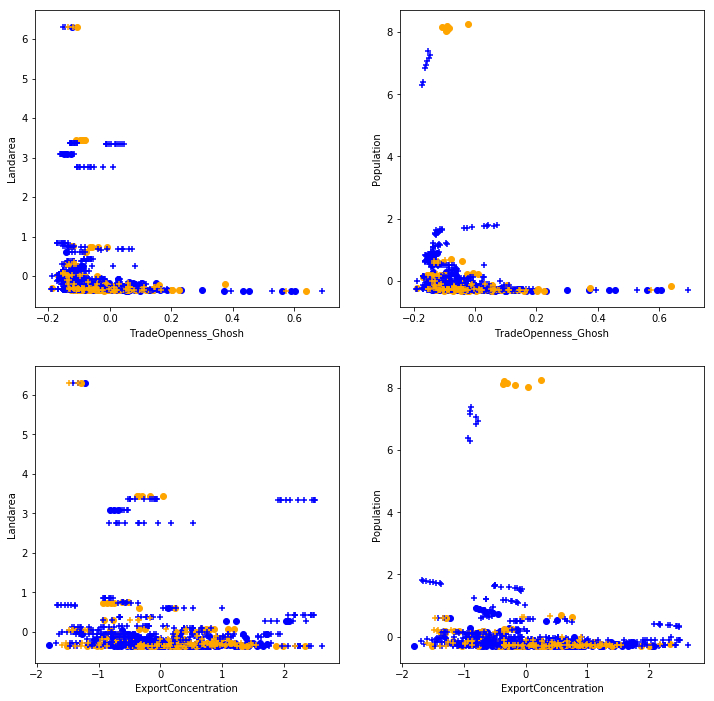

In [20]:
nr.seed(444)
rf_clf = RandomForestClassifier(n_estimators=40)
rf_clf.fit(X_train, y_train)
scores = rf_clf.predict(X_test)
print_metrics_3(y_test, scores) 
plot_data_score(X_test, y_test, scores)

In [23]:
## The Random Forest model with 40 treesgives slightly better results.

## Feature importance can be used as a feature selection method
## Display a plot of the feature importance

Text(0, 0.5, 'Feature importance')

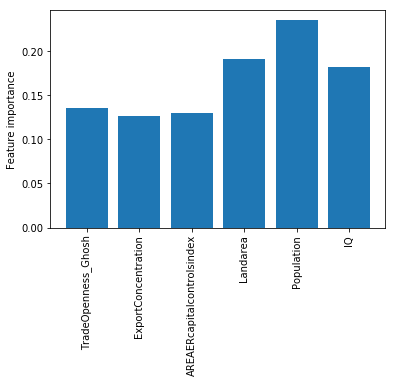

In [22]:
importance = rf_clf.feature_importances_
plt.bar(range(6), importance, tick_label = ['TradeOpenness_Ghosh', 'ExportConcentration', 'AREAERcapitalcontrolsindex', 'Landarea', 'Population', 'IQ'])
plt.xticks(rotation=90)
plt.ylabel('Feature importance')

## Next we create a new model with a reduced feature set and compare the results.
## As a first step, we create training and test datasets using the reduced features. 

In [25]:
## Create reduced feature set
Features = np.array(data[['TradeOpenness_Ghosh', 'Landarea ', 'Population', 'IQ']])

## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 1425)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

##  As a final setep we define the random forest model with 40 trees, fit the model, score the model and print the results.  

In [26]:
nr.seed(444)
rf_clf = RandomForestClassifier(n_estimators=40)
rf_clf.fit(X_train, y_train)
scores = rf_clf.predict(X_test)
print_metrics_3(y_test, scores)

                 Confusion matrix
                 Score Flexible   Score Intermediate    Score Fixed
Actual Flexible         470               74               122
Actual Intermediate      56               95                59
Actual Fixed             73               30               446

Accuracy        0.71
 
          Flexible  Intermediate  Fixed
Num case   666.00     210.00      549.00
Precision   0.78      0.48       0.71
Recall      0.71      0.45       0.81
F1          0.74      0.46       0.76


## Reducing those two features does not improve model performance. So, those two features - trade openness and capital controls should be retained in the model.